                dataset      method  KS statistic       p-value  \
0           Exponential  Fixed Bins      0.096510  8.295925e-08   
1           Exponential         GMM      0.042184  7.686409e-02   
2           Exponential     Laplace      0.194000  2.265926e-30   
3           Exponential  Decimal AR      0.037694  1.478059e-01   
4    Square + Student t  Fixed Bins      0.063306  1.323141e-03   
..                  ...         ...           ...           ...   
115  Square + Student t  Decimal AR      0.067020  5.475213e-04   
116     ARIMA Residuals  Fixed Bins      0.130438  9.325848e-12   
117     ARIMA Residuals         GMM      0.105188  8.587462e-08   
118     ARIMA Residuals     Laplace      0.124500  9.526585e-11   
119     ARIMA Residuals  Decimal AR      0.100312  3.987595e-07   

     Wasserstein Distance  
0                0.115748  
1                0.050113  
2                0.328035  
3                0.046562  
4                0.082194  
..                    ...  

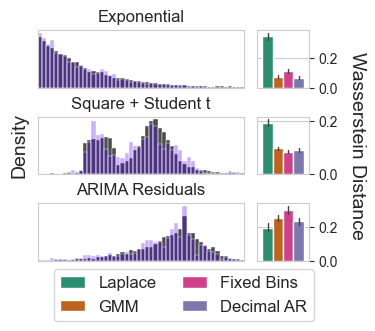

In [4]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
import matplotlib 
# matplotlib.rcParams.update({'font.size': 18})

ds_map = {
    "Exponential": "Exponential",
    "square_student_t_mixture": "Square + Student t",
    "ARIMA Residuals": "ARIMA Residuals",
}

#increase vertical spacing
fig, ax = plt.subplots(
    3, 2, 
    figsize=(3.5, 3),
    gridspec_kw={'width_ratios': [6, 1.5], 'hspace': 0.5, 'wspace': 0.1},
)

w_dist_map = {
    "Exponent.": "Exponential",
    "Square +\nStudent-t": "Square + Student t",
    "ARIMA\nResiduals": "ARIMA Residuals",
}

csv_fn = "../precomputed_outputs/uncertainty_quantification/wasserstein.csv"
df = pd.read_csv(csv_fn)
df["dataset"] = df["dataset"].apply(lambda x: w_dist_map[x])
print(df)

samples_fn = "../precomputed_outputs/uncertainty_quantification/samples.pkl"
with open(samples_fn,'rb') as f:
    out_all = pickle.load(f)

for i,(ds, datadict) in enumerate(out_all.items()):
    print(ds)

    samples = datadict['data']
    rnn_samples = datadict['RNN-8']
    # make seaborn histograms

    bins = np.quantile(samples,.005),np.quantile(samples,.99)
    ax[i,0].set_xlim(*bins)

    sns.histplot(
        samples,
        ax=ax[i,0],
        kde=False,
        bins=50,
        stat='density',
        alpha=.7, 
        binrange=bins,
        label='Ground Truth',
        color='k',
        edgecolor=None
    )

    ar_color = '#4f01ecff'# sns.color_palette('Dark2')[3]
    sns.histplot(
        rnn_samples,
        ax=ax[i,0],
        kde=False,
        bins=50,
        stat='density',
        alpha=.3, 
        binrange=bins,
        label='Decimal AR',
        color=ar_color,
        edgecolor=None
    )
    
    if i == 1:
        y_label = ax[i,0].yaxis.get_label().get_text()
        print(y_label)
        ax[i,0].set_ylabel(y_label, labelpad=7, fontsize=14)
    else:
        ax[i,0].set_ylabel("")

    if i!=2:
        ax[i,0].set_xticks([])

    ax[i,0].set_title(ds_map[ds])#, y=0.65, x=0.27, fontsize=14)
    ax[i,0].grid(False)
    ax[i,0].set_yticks([])
    ax[i,0].set_xticklabels([])

    _df = df[df["dataset"] == ds_map[ds]]
    sns.barplot(
        x='dataset',
        y='Wasserstein Distance',
        hue='method',
        hue_order=["Laplace","GMM","Fixed Bins","Decimal AR"],
        errwidth=1,
        data=_df,
        ax=ax[i,1], 
        palette=sns.color_palette('Dark2')[:2] + sns.color_palette('Dark2')[3:4] + sns.color_palette('Dark2')[2:3]
    )
    ax[i,1].get_legend().remove()
    ax[i,1].set_title("")
    ax[i,1].set_xlabel("")
    ax[i,1].set_xticklabels([])

    #flip y axis labels to be on the right
    ax[i,1].yaxis.tick_right()
    ax[i,1].yaxis.set_label_position("right")

    if i == 1:
        y_label = ax[i,1].yaxis.get_label().get_text()
        #flipped horizontally 
        ax[i,1].set_ylabel(y_label, labelpad=20, fontsize=14, rotation=270)
    else:
        ax[i,1].set_ylabel("")

# plt.subplots_adjust(wspace=0, hspace=0)
ax[0,1].legend(
    # loc='upper right', 
    ncol=2, 
    labelspacing=0.5,
    handlelength=1.5, 
    columnspacing=1.5,
    fontsize=12,
    bbox_to_anchor=(1.25, -3),
    frameon=True,
)

# plt.tight_layout()
plt.subplots_adjust(hspace=0.1)  # adjust space between axes
plt.savefig('outputs/histograms.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# import pickle
# import matplotlib 
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# sns.set_style("whitegrid")
# matplotlib.rcParams.update({'font.size': 18})

# with open("uncertainty_results.pkl", 'rb') as f:
#     out_alls = pickle.load(f)

# samples = out_alls[0]["square_student_t_mixture"]['data']

# fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# bins = np.quantile(samples,.009),np.quantile(samples,.991)

# # samples = (samples + 7) / 2
# # bins = (bins[0] + 7) / 2, (bins[1] + 7) / 2

# sns.histplot(samples,ax=ax,kde=False,bins=100,stat='density',alpha=.7, binrange=bins,label='GT',color='k')

# ax.set_ylim(0,0.33)
# ax.set_xlabel("Value")

# y_ticks = ax.get_yticks()
# y_tick_labels = ax.get_yticklabels()

# y_ticks = y_ticks[:3]
# y_tick_labels = y_tick_labels[:3]

# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_tick_labels)
# ax.set_xlabel("")

# ax.set_xlim(*bins)

# ax.spines[['right', 'top']].set_visible(False)
# ax.spines['left'].set_bounds(0, 0.12)

# plt.grid(False)

# color1 = '#a60355'
# color2 = '#5400c2'

# h1, h2, h3, h4 = np.linspace(0.3, 0.12, num=4, endpoint=True)
# x1, x2 = ax.get_xlim()
# y1, y2 = ax.get_xlim()
# x = (x1 + x2) / 2

# plt.text(
#     x-14, h1 + 0.05, 
#     "0.195 $\\rightarrow$ ['1','9','5']", 
#     color="black", fontsize=12,
#     bbox=dict(
#         facecolor='none', edgecolor=color1, boxstyle='round', linewidth=0.5
#     )
# )
# plt.text(
#     x+3, h1 + 0.05, 
#     "0.537 $\\rightarrow$ ['5','3','7']", 
#     color="black", fontsize=12,
#     bbox=dict(
#         facecolor='none', edgecolor=color2, boxstyle='round', linewidth=0.5
#     )
# )

# for i in range(10):
#     bin_size = (x2 - x1) / 10
#     y = x - 4.5 * bin_size + bin_size * i

#     if i == 1:
#         plt.plot([x, y], [h1, h2], linewidth=1.5, color=color1)
#         plt.text(
#             (x+y)/2 - 6, (h1+h2)/2 + 0.01, 
#             "P$\,$('1')", 
#             fontsize=11, color='black',
#             bbox=dict(
#                 facecolor='white', edgecolor=color1, boxstyle='round', linewidth=0.5
#             )
#         )
#     elif i == 5:
#         plt.plot([x, y], [h1, h2], linewidth=1.5, color=color2)
#         plt.text(
#             (x+y)/2 + 1, (h1+h2)/2 + 0.01, 
#             "P$\,$('5')", 
#             fontsize=11, color='black',
#             bbox=dict(
#                 facecolor='white', edgecolor=color2, boxstyle='round', linewidth=0.5
#             )
#         )
#     else:
#         plt.plot([x, y], [h1, h2], linewidth=0.25, color='black')
    
#     for j in range(10):
#         bin_size = (x2 - x1) / 100
#         z = y - 4.5 * bin_size + bin_size * j
#         # plt.scatter(z, 0.15, s=5, linewidth=0.5, edgecolor='black',color='grey')
#         if i == 1 and j == 9:
#             plt.plot([y, z], [h2, h3], linewidth=1.5, color=color1)
#             plt.text(
#                 (y+z)/2 + 1.5, (h2+h3)/2 - 0.01, 
#                 "P$\,$('9' | '1')", 
#                 fontsize=11, color='black',
#                 bbox=dict(
#                     facecolor='white', edgecolor=color1, boxstyle='round', linewidth=0.5
#                 )
#             )
#         elif i == 5 and j == 2:
#             plt.plot([y, z], [h2, h3], linewidth=1.5, color=color2)
#             plt.text(
#                 (y+z)/2 + 1, (h2+h3)/2 - 0.01, 
#                 "P$\,$('3' | '5')", 
#                 fontsize=11, color='black',
#                 bbox=dict(
#                     facecolor='white', edgecolor=color2, boxstyle='round', linewidth=0.5
#                 )
#             )
#         else:
#             plt.plot([y, z], [h2, h3], linewidth=0.1, alpha=0.5, color='black')

#         for k in range(10):
#             bin_size = (x2 - x1) / 1000
#             zz = z - 4.5 * bin_size + bin_size * k
#             # plt.scatter(z, 0.15, s=5, linewidth=0.5, edgecolor='black',color='grey')
#             if i == 1 and j == 9 and k == 4:
#                 plt.plot([z, zz], [h3, h4], linewidth=1.5, color=color1)
#                 # plt.plot([z, zz], [h3, h4], linewidth=0.01, alpha=0.1, color='red')
#                 plt.text(
#                     (z+zz)/2 - 7, (h3+h4)/2 - 0.01, 
#                     "P$\,$('5' | '19')", 
#                     fontsize=11, color='black',
#                     bbox=dict(
#                         facecolor='white', edgecolor=color1, boxstyle='round', linewidth=0.5
#                     )
#                 )
#             elif i == 5 and j == 2 and k == 9:
#                 plt.plot([z, zz], [h3, h4], linewidth=1.5, color=color2)
#                 plt.text(
#                     (z+zz)/2 + 1, (h3+h4)/2 - 0.01, 
#                     "P$\,$('7' | '53')", 
#                     fontsize=11, color='black',
#                     bbox=dict(
#                         facecolor='white', edgecolor=color2, boxstyle='round', linewidth=0.5
#                     )
#                 )

#         if i == 1 and j == 9:
#             plt.scatter(z, h3, s=1, linewidth=0.1, edgecolor=color1,color=color1, zorder=10)
#         elif i == 5 and j == 2:
#             plt.scatter(z, h3, s=1, linewidth=0.1, edgecolor=color2,color=color2, zorder=10)
#         else:
#             plt.scatter(z, h3, s=1, linewidth=0.1, edgecolor='black',color='grey', zorder=10)

#     if i == 1:
#         plt.scatter(y, h2, s=10, linewidth=0.5, edgecolor=color1,color=color1, zorder=10)
#     elif i == 5:
#         plt.scatter(y, h2, s=10, linewidth=0.5, edgecolor=color2,color=color2, zorder=10)
#     else:
#         plt.scatter(y, h2, s=10, linewidth=0.5, edgecolor='black',color='grey', zorder=10)

# plt.scatter(x, h1, s=20, linewidth=0.5, edgecolor='black',color='grey', zorder=10)

# # ycoords = ax.get_label_coords()
# # print(ycoords)
# ax.set_yticks([])

# #set xticks to split xlim into 10 equal parts
# ax.set_xticks(np.linspace(*ax.get_xlim(), num=6, endpoint=True))
# ax.set_xticklabels([
#     '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'
# ])

# ax.yaxis.set_label_coords(-0.04,0.2)

# # ax.xaxis.set_label_coords(0.5,-0.13)
# plt.show()

# fig.savefig("hierarchical.pdf", dpi=300, bbox_inches='tight')